In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from kdelearn.kde_tasks import KDEOutliersDetection
from kdelearn.metrics import pi_kf

In [12]:
!ls ../../data/annthyroid/

ann-Readme  ann-test.data  ann-thyroid.names  ann-train.data  extra  HELLO


In [13]:
columns = ["age", "sex", "on thyroxine", "query on thyroxine", "on antithyroid medication", "sick",
           "pregnant", "thyroid surgery", "I131 treatment", "query hypothyroid", "query hyperthyroid",
           "lithium", "goitre", "tumor", "hypopituitary", "psych", "TSH", "T3", "TT4", "T4U", "FTI", "TBG", "tmp1", "tmp2"]

In [14]:
data_train = pd.read_csv("../../data/annthyroid/ann-train.data", sep=" ", names=columns)
print(data_train.shape)

data_test = pd.read_csv("../../data/annthyroid/ann-test.data", sep=" ", names=columns)
print(data_test.shape)

data = pd.concat((data_train, data_test))
print(data.shape)

(3772, 24)
(3428, 24)
(7200, 24)


In [15]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,tmp1,tmp2
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0.00060,0.015,0.120,0.082,0.146,3,NaN,NaN
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0.00025,0.030,0.143,0.133,0.108,3,NaN,NaN
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0.00190,0.024,0.102,0.131,0.078,3,NaN,NaN
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0.00090,0.017,0.077,0.090,0.085,3,NaN,NaN
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0.00025,0.026,0.139,0.090,0.153,3,NaN,NaN


Class 1: (normal), Class 2: (hyper), Class 3: (hypo)

In [16]:
data["TBG"].value_counts()

3    6666
2     368
1     166
Name: TBG, dtype: int64

# 1d analysis

## Age

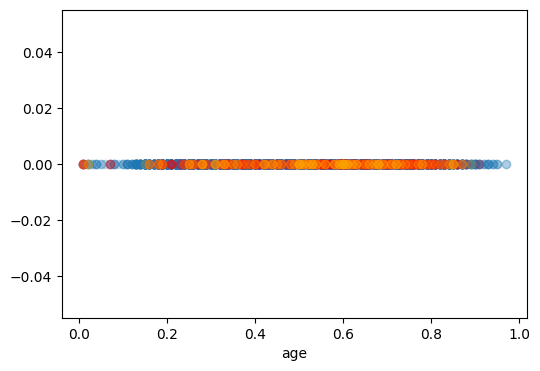

In [17]:
plt.figure(figsize=(6 ,4))
plt.scatter(data.loc[data["TBG"] == 3, "age"], data.loc[data["TBG"] == 3, "age"]*0, alpha=0.2)
plt.scatter(data.loc[data["TBG"] == 2, "age"], data.loc[data["TBG"] == 2, "age"]*0, c="red", alpha=0.2)
plt.scatter(data.loc[data["TBG"] == 1, "age"], data.loc[data["TBG"] == 1, "age"]*0, c="orange", alpha=0.2)
plt.xlabel("age")
plt.show()

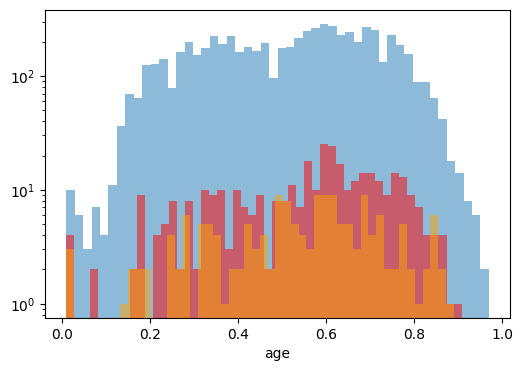

In [18]:
plt.figure(figsize=(6, 4))
plt.hist(data.loc[data["TBG"] == 3, "age"], bins=50, alpha=0.5)
plt.hist(data.loc[data["TBG"] == 2, "age"], bins=50, alpha=0.5, color="red")
plt.hist(data.loc[data["TBG"] == 1, "age"], bins=50, alpha=0.5, color="orange")
plt.yscale("log")
plt.xlabel("age")
plt.show()

## TSH

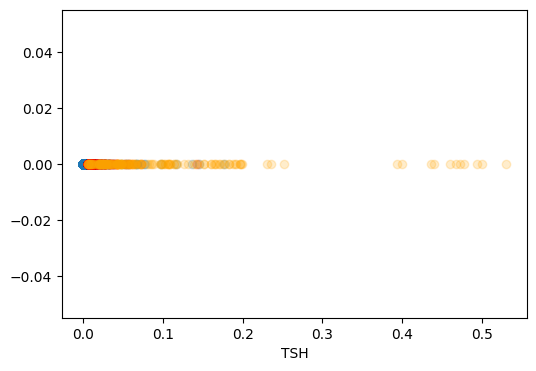

In [19]:
plt.figure(figsize=(6 ,4))
plt.scatter(data.loc[data["TBG"] == 3, "TSH"], data.loc[data["TBG"] == 3, "TSH"]*0, alpha=0.2)
plt.scatter(data.loc[data["TBG"] == 2, "TSH"], data.loc[data["TBG"] == 2, "TSH"]*0, c="red", alpha=0.2)
plt.scatter(data.loc[data["TBG"] == 1, "TSH"], data.loc[data["TBG"] == 1, "TSH"]*0, c="orange", alpha=0.2)
plt.xlabel("TSH")
plt.show()

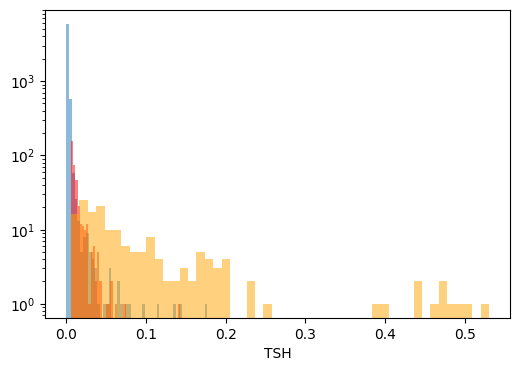

In [20]:
plt.figure(figsize=(6, 4))
plt.hist(data.loc[data["TBG"] == 3, "TSH"], bins=50, alpha=0.5)
plt.hist(data.loc[data["TBG"] == 2, "TSH"], bins=50, alpha=0.5, color="red")
plt.hist(data.loc[data["TBG"] == 1, "TSH"], bins=50, alpha=0.5, color="orange")
plt.yscale("log")
plt.xlabel("TSH")
plt.show()

## T3

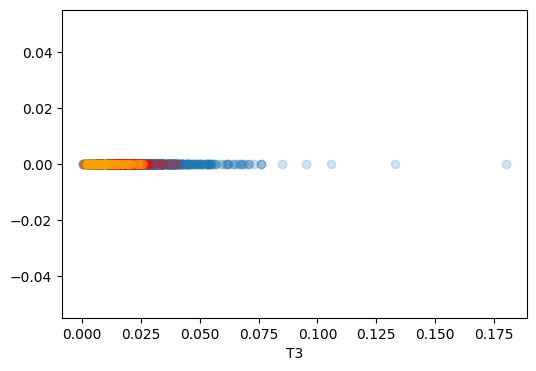

In [21]:
plt.figure(figsize=(6 ,4))
plt.scatter(data.loc[data["TBG"] == 3, "T3"], data.loc[data["TBG"] == 3, "T3"]*0, alpha=0.2)
plt.scatter(data.loc[data["TBG"] == 2, "T3"], data.loc[data["TBG"] == 2, "T3"]*0, c="red", alpha=0.2)
plt.scatter(data.loc[data["TBG"] == 1, "T3"], data.loc[data["TBG"] == 1, "T3"]*0, c="orange", alpha=0.2)
plt.xlabel("T3")
plt.show()

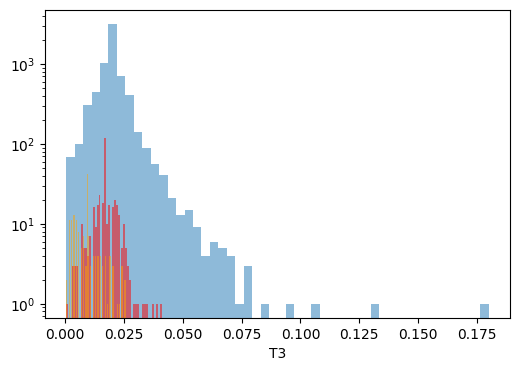

In [22]:
plt.figure(figsize=(6, 4))
plt.hist(data.loc[data["TBG"] == 3, "T3"], bins=50, alpha=0.5)
plt.hist(data.loc[data["TBG"] == 2, "T3"], bins=50, alpha=0.5, color="red")
plt.hist(data.loc[data["TBG"] == 1, "T3"], bins=50, alpha=0.5, color="orange")
plt.yscale("log")
plt.xlabel("T3")
plt.show()

## TT4

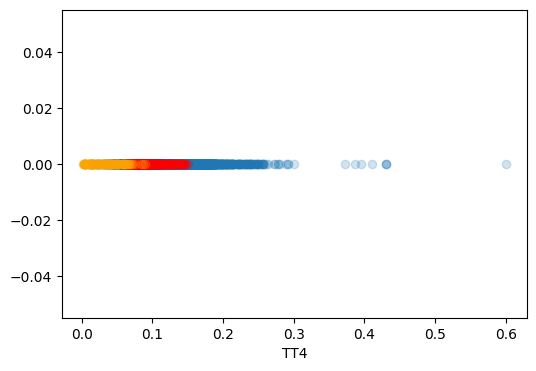

In [23]:
plt.figure(figsize=(6 ,4))
plt.scatter(data.loc[data["TBG"] == 3, "TT4"], data.loc[data["TBG"] == 3, "TT4"]*0, alpha=0.2)
plt.scatter(data.loc[data["TBG"] == 2, "TT4"], data.loc[data["TBG"] == 2, "TT4"]*0, c="red", alpha=0.2)
plt.scatter(data.loc[data["TBG"] == 1, "TT4"], data.loc[data["TBG"] == 1, "TT4"]*0, c="orange", alpha=0.2)
plt.xlabel("TT4")
plt.show()

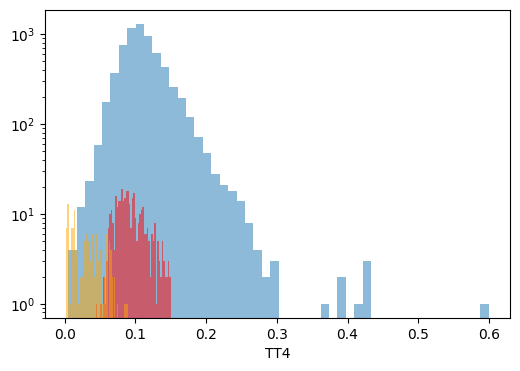

In [24]:
plt.figure(figsize=(6, 4))
plt.hist(data.loc[data["TBG"] == 3, "TT4"], bins=50, alpha=0.5)
plt.hist(data.loc[data["TBG"] == 2, "TT4"], bins=50, alpha=0.5, color="red")
plt.hist(data.loc[data["TBG"] == 1, "TT4"], bins=50, alpha=0.5, color="orange")
plt.yscale("log")
plt.xlabel("TT4")
plt.show()

## T4U

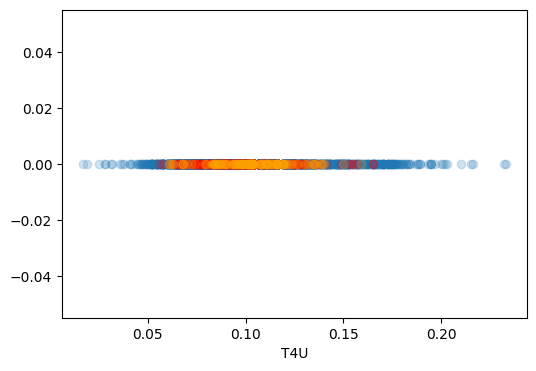

In [25]:
plt.figure(figsize=(6 ,4))
plt.scatter(data.loc[data["TBG"] == 3, "T4U"], data.loc[data["TBG"] == 3, "T4U"]*0, alpha=0.2)
plt.scatter(data.loc[data["TBG"] == 2, "T4U"], data.loc[data["TBG"] == 2, "T4U"]*0, c="red", alpha=0.2)
plt.scatter(data.loc[data["TBG"] == 1, "T4U"], data.loc[data["TBG"] == 1, "T4U"]*0, c="orange", alpha=0.2)
plt.xlabel("T4U")
plt.show()

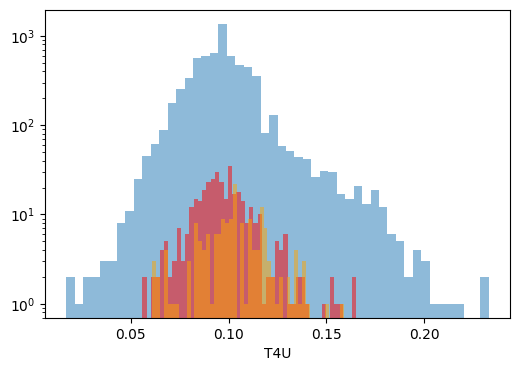

In [26]:
plt.figure(figsize=(6, 4))
plt.hist(data.loc[data["TBG"] == 3, "T4U"], bins=50, alpha=0.5)
plt.hist(data.loc[data["TBG"] == 2, "T4U"], bins=50, alpha=0.5, color="red")
plt.hist(data.loc[data["TBG"] == 1, "T4U"], bins=50, alpha=0.5, color="orange")
plt.yscale("log")
plt.xlabel("T4U")
plt.show()

## FTI

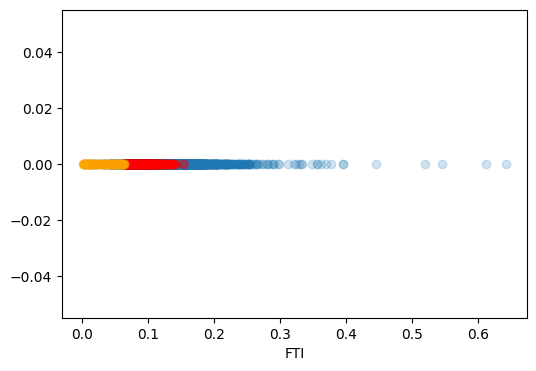

In [27]:
plt.figure(figsize=(6 ,4))
plt.scatter(data.loc[data["TBG"] == 3, "FTI"], data.loc[data["TBG"] == 3, "FTI"]*0, alpha=0.2)
plt.scatter(data.loc[data["TBG"] == 2, "FTI"], data.loc[data["TBG"] == 2, "FTI"]*0, c="red", alpha=0.2)
plt.scatter(data.loc[data["TBG"] == 1, "FTI"], data.loc[data["TBG"] == 1, "FTI"]*0, c="orange", alpha=0.2)
plt.xlabel("FTI")
plt.show()

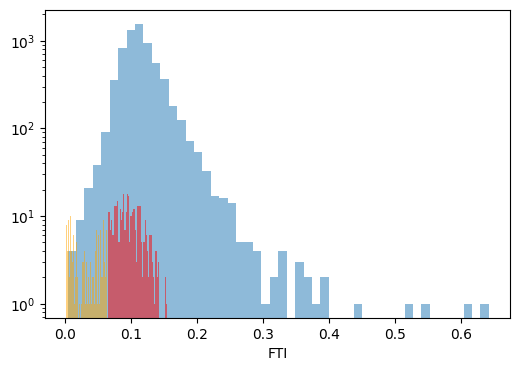

In [28]:
plt.figure(figsize=(6, 4))
plt.hist(data.loc[data["TBG"] == 3, "FTI"], bins=50, alpha=0.5)
plt.hist(data.loc[data["TBG"] == 2, "FTI"], bins=50, alpha=0.5, color="red")
plt.hist(data.loc[data["TBG"] == 1, "FTI"], bins=50, alpha=0.5, color="orange")
plt.yscale("log")
plt.xlabel("FTI")
plt.show()

# Outliers detection

## all data

In [35]:
data_all = data[["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]].copy()

x_train = data_all[["TSH", "T3", "TT4", "T4U", "FTI"]].to_numpy().copy()
# x_train , idx, weights_train = np.unique(x_train, axis=0, return_index=True, return_counts=True)
# labels_train = data_all["TBG"].to_numpy().copy()[idx]
labels_train = data_all["TBG"].to_numpy().copy()
labels_train[labels_train!=3] = 1
labels_train[labels_train==3] = 0

In [36]:
x_train.shape, (labels_train == 1).sum() / x_train.shape[0]

((7200, 5), 0.07416666666666667)

In [37]:
outliers_detector = KDEOutliersDetection().fit(x_train, r=0.074)
labels_pred = outliers_detector.predict(x_train)
scores = outliers_detector.kde.pdf(x_train)

In [72]:
outliers_detector.kde.bandwidth

array([0.00042606, 0.00026302, 0.00372551, 0.00151481, 0.00336712])

In [73]:
metric = pi_kf(x_train, labels_pred, bandwidth=outliers_detector.kde.bandwidth)
metric

0.9999996349353134

In [27]:
np.quantile(scores, 0.01), np.quantile(scores, 0.05), np.quantile(scores, 0.077), np.quantile(scores, 0.1)

(659117876.109374, 659117876.109374, 659117876.109679, 659117877.741257)

In [28]:
labels_pred.sum(), labels_train.sum()

(533, 534)

In [29]:
res = confusion_matrix(labels_train, labels_pred)
res

array([[6358,  308],
       [ 309,  225]])

In [30]:
print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

precision: 0.42213883677298314
recall: 0.42134831460674155
accuracy: 0.9143055555555556


In [83]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=outliers_detector.kde.bandwidth*0.5, r=0.074)
labels_pred = outliers_detector.predict(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=outliers_detector.kde.bandwidth*0.5)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

533 534
0.9999412587911399
[[6357  309]
 [ 310  224]]
precision: 0.4202626641651032
recall: 0.41947565543071164
accuracy: 0.9140277777777778


In [84]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=outliers_detector.kde.bandwidth*2, r=0.074)
labels_pred = outliers_detector.predict(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=outliers_detector.kde.bandwidth*2)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

533 534
0.2210641044637306
[[6365  301]
 [ 302  232]]
precision: 0.4352720450281426
recall: 0.4344569288389513
accuracy: 0.91625


In [85]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=outliers_detector.kde.bandwidth*10, r=0.074)
labels_pred = outliers_detector.predict(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=outliers_detector.kde.bandwidth*10)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

533 534
0.9450119164459787
[[6328  338]
 [ 339  195]]
precision: 0.36585365853658536
recall: 0.3651685393258427
accuracy: 0.9059722222222222


In [86]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=outliers_detector.kde.bandwidth, r=0.1)
labels_pred = outliers_detector.predict(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=outliers_detector.kde.bandwidth)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

720 534
0.4407852842268215
[[6170  496]
 [ 310  224]]
precision: 0.3111111111111111
recall: 0.41947565543071164
accuracy: 0.8880555555555556


In [88]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=outliers_detector.kde.bandwidth, r=0.15)
labels_pred = outliers_detector.predict(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=outliers_detector.kde.bandwidth)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

1080 534
0.535394736307909
[[5852  814]
 [ 268  266]]
precision: 0.2462962962962963
recall: 0.49812734082397003
accuracy: 0.8497222222222223


In [87]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=outliers_detector.kde.bandwidth, r=0.2)
labels_pred = outliers_detector.predict(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=outliers_detector.kde.bandwidth)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

1440 534
0.5940499022345984
[[5526 1140]
 [ 234  300]]
precision: 0.20833333333333334
recall: 0.5617977528089888
accuracy: 0.8091666666666667
